## Extracting and Visualizing Stock Data

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#ignore warnings using warnings module
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

**Define Graphing Function**

In [21]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,height=900,title=stock,xaxis_rangeslider_visible=True)
    fig.write_html('plotly_graph.html')
    fig.show()

**Extract Stock Data Using yfinance library**

In [6]:
#create a stock 'tesla' using the Ticker function and its symbol TSLA
tesla = yf.Ticker('TSLA')
#extract data using Ticker object 'tesla' and history function 
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Extract Revenue Data Using WebScraping**

In [12]:
#using requests library to download the webpage 
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

#using soup object to parse the html_data
soup = BeautifulSoup(html_data, 'html.parser')

#extract the table with read_html() function
tesla_revenue = pd.read_html(str(soup))
df = tesla_revenue[1]
#tesla_revenue[1].columns
df = df.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date', 'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue'})

#remove the comma and $ sign, a null or empty string from the 'Revenue' column
df['Revenue'] = df['Revenue'].replace({r'[,\$]': ''}, regex=True)
df.dropna(inplace=True)
df = df[df['Revenue'] != ""]
df.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


**Plot Tesla Stock Graph**

C:\Users\Nurana\AppData\Local\Temp\ipykernel_8456\757449454.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Nurana\AppData\Local\Temp\ipykernel_8456\757449454.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



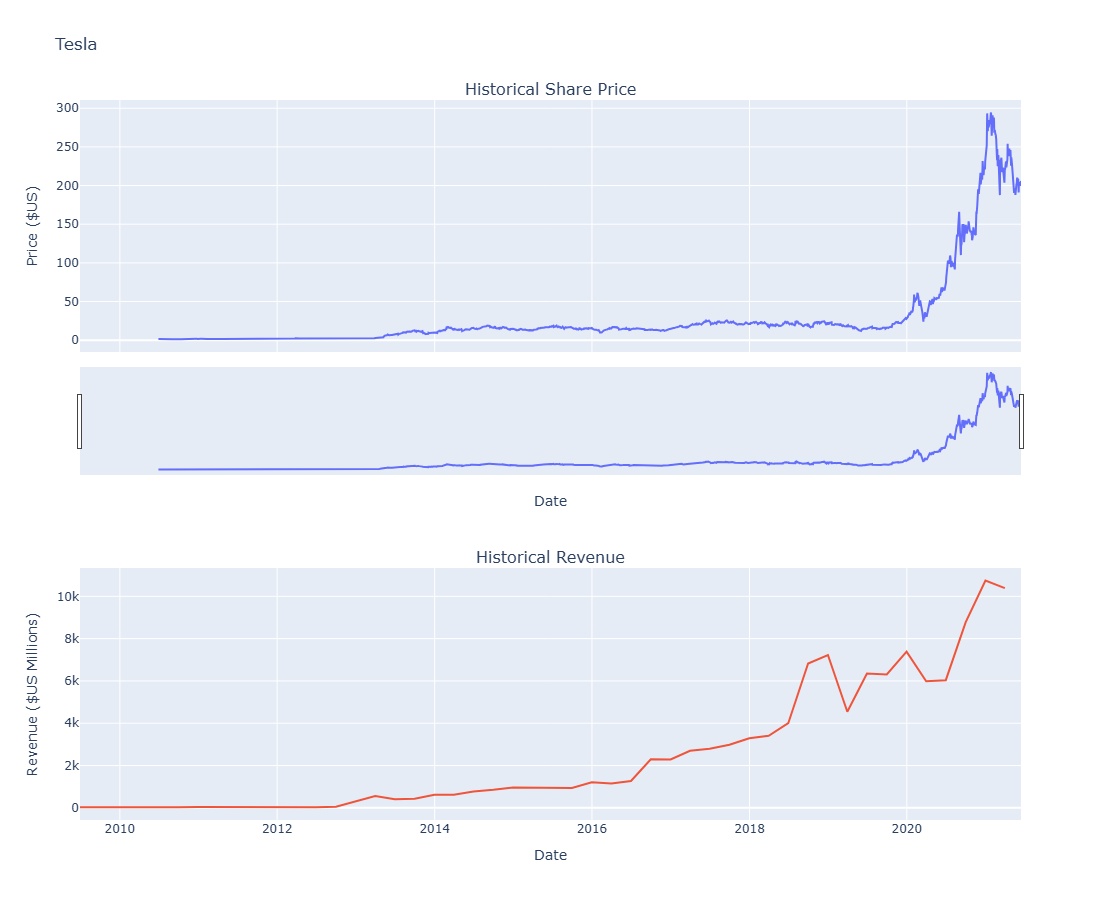

In [20]:
make_graph(tesla_data, df, 'Tesla')